# Formatting The Plots

Since the plotting functionality is implemented as a recipe to Plots.jl, [all of the options open to Plots.jl can be used in our plots](https://juliaplots.github.io/supported/). In addition, there are special features specifically for [differential equation plots](http://docs.juliadiffeq.org/latest/basics/plot.html). This tutorial will teach some of the most commonly used options. Let's first get the solution to some ODE. Here I will use one of the Lorenz ordinary differential equation. As with all commands in DifferentialEquations.jl, I got a plot of the solution by calling `solve` on the problem, and `plot` on the solution:

In [4]:
using DifferentialEquations, Plots
pyplot()
lorenz = @ode_def Lorenz begin
  dx = σ*(y-x)
  dy = ρ*x-y-x*z
  dz = x*y-β*z
end σ β ρ

p = [10.0,8/3,28]
u0 = [1., 5., 10.]
tspan = (0., 100.)
prob = ODEProblem(lorenz, u0, tspan, p)
sol = solve(prob)

┌ Info: Recompiling stale cache file /home/gary/.julia/compiled/v0.7/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1185
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at none:0
└ @ Core none:0


ErrorException: invalid redefinition of constant Lorenz

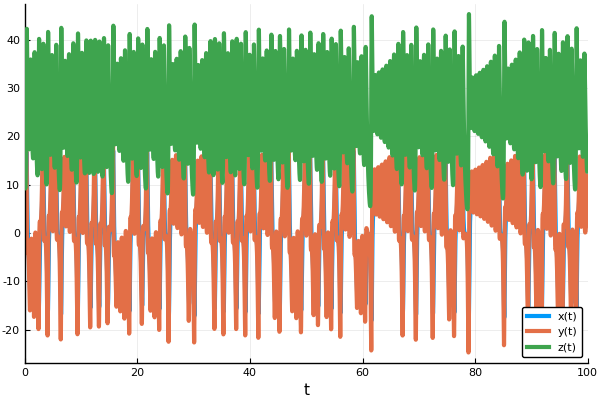

In [6]:
plot(sol)

Now let's change it to a phase plot. As discussed in the [plot functions page](http://docs.juliadiffeq.org/latest/basics/plot.html), we can use the `vars` command to choose the variables to plot. Let's plot variable `x` vs variable `y` vs variable `z`:

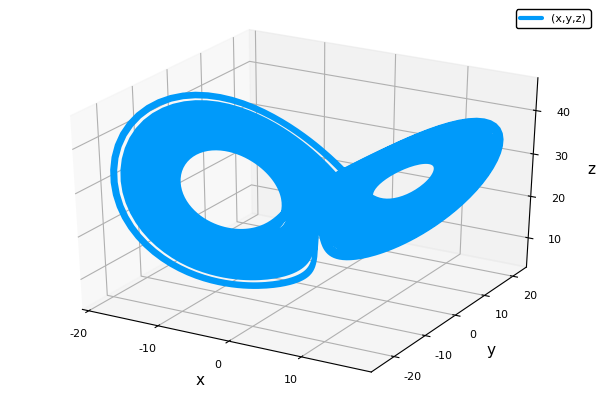

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:1132
└ @ Plots /home/gary/.julia/packages/Plots/ex9On/src/backends/pyplot.jl:1132


In [7]:
plot(sol,vars=(:x,:y,:z))

We can also choose to plot the timeseries for a single variable:

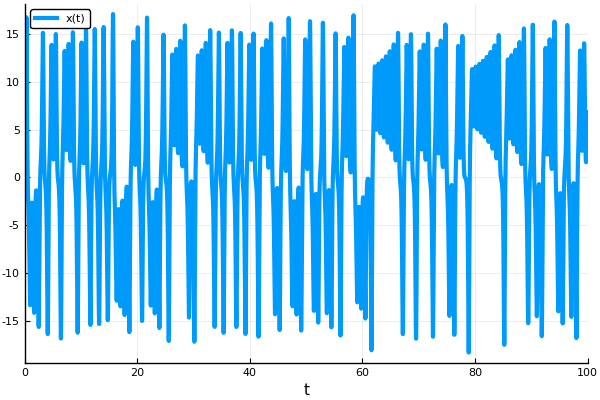

In [8]:
plot(sol,vars=[:x])

Notice that we were able to use the variable names because we had defined the problem with the macro. But in general, we can use the indices. The previous plots would be:

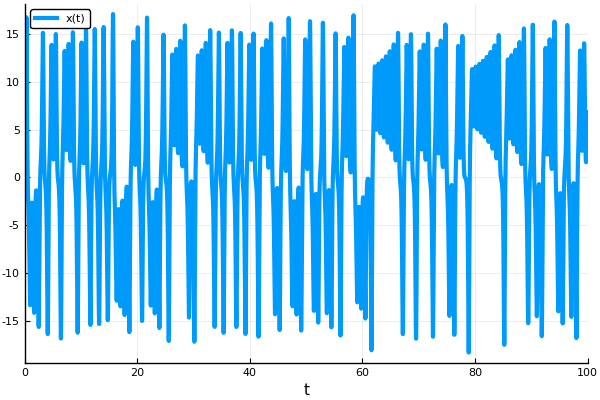

In [9]:
plot(sol,vars=(1,2,3))
plot(sol,vars=[1])

Common options are to add titles, axis, and labels. For example:

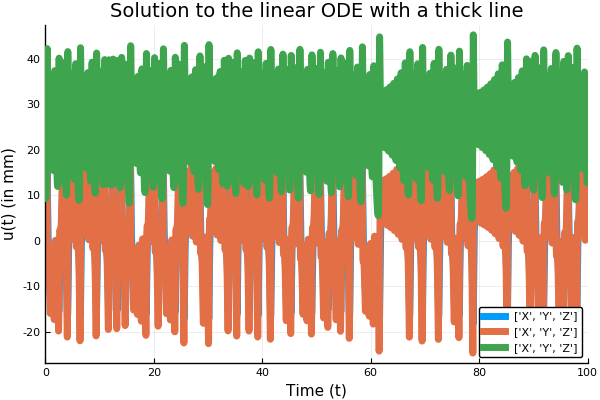

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:970
└ @ Plots /home/gary/.julia/packages/Plots/ex9On/src/backends/pyplot.jl:970
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:970
└ @ Plots /home/gary/.julia/packages/Plots/ex9On/src/backends/pyplot.jl:970
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = _before_layout_calcs(::Plots.Plot{Plots.PyPlotBackend}) at pyplot.jl:971
└ @ Plots /home/gary/.julia/packages/Plots/ex9On/src/backends/pyplot.jl

In [10]:
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
xaxis="Time (t)",yaxis="u(t) (in mm)",label=["X","Y","Z"])

Notice that series recipes apply to the solution type as well. For example, we can use a scatter plot on the timeseries:

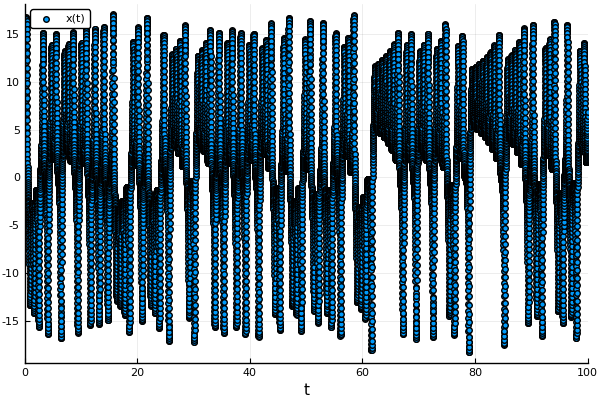

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = py_add_series(::Plots.Plot{Plots.PyPlotBackend}, ::Plots.Series) at pyplot.jl:546
└ @ Plots /home/gary/.julia/packages/Plots/ex9On/src/backends/pyplot.jl:546
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [11]:
scatter(sol,vars=[:x])

This shows that the recipe is using the interpolation to smooth the plot. It becomes abundantly clear when we turn it off using `denseplot=false`:

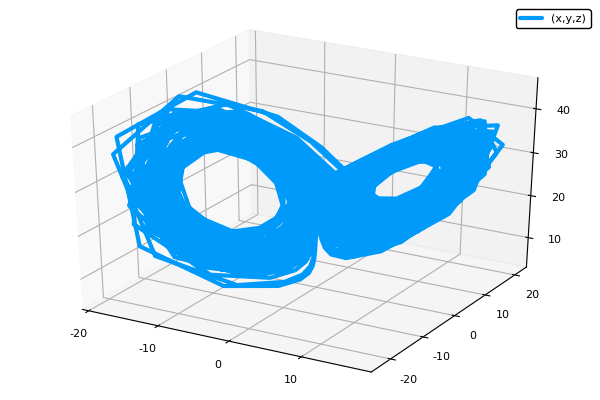

In [12]:
plot(sol,vars=(1,2,3),denseplot=false)

When this is done, only the values the timestep hits are plotted. Using the interpolation usually results in a much nicer looking plot so it's recommended, and since the interpolations have similar orders to the numerical methods, their results are trustworthy on the full interval. We can control the number of points used in the interpolation's plot using the `plotdensity` command:

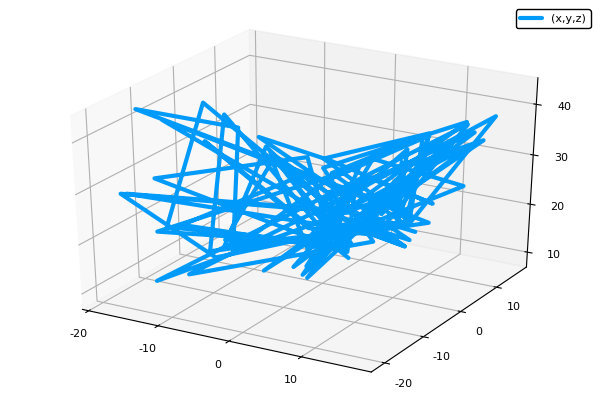

In [13]:
plot(sol,vars=(1,2,3),plotdensity=100)

That's plotting the entire solution using 100 points spaced evenly in time. 

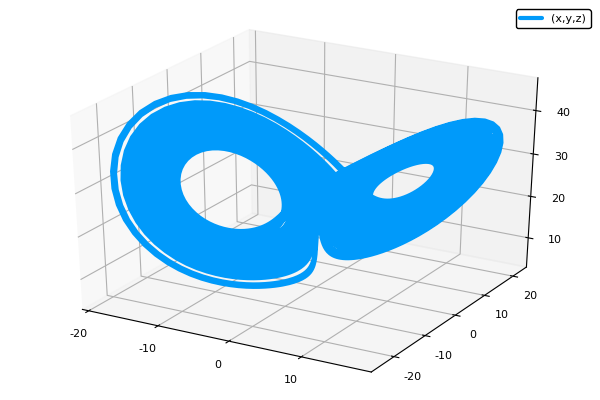

In [14]:
plot(sol,vars=(1,2,3),plotdensity=10000)

That's more like it! By default it uses `100*length(sol)`, where the length is the number of internal steps it had to take. This heuristic usually does well, but unusually difficult equations it can be relaxed (since it will take small steps), and for equations with events / discontinuities raising the plot density can help resolve the discontinuity.

Lastly notice that we can compose plots. Let's show where the 100 points are using a scatter plot:

In [11]:
plot(sol,vars=(1,2,3))
scatter!(sol,vars=(1,2,3),plotdensity=100)

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip5400)" style="stroke:#000000; stroke-width:1; stroke-opacity:1; fill:none" points="
 126.081,354.311 126.081,354.311 123.416,355.601 126.081,354.311 126.081,326.512 124.748,327.157 126.081,326.512 126.081,298.712 123.416,300.003 126.081,298.712 
 126.081,270.913 124.748,271.558 126.081,270.913 126.081,243.114 123.416,244.404 126.081,243.114 126.081,215.315 124.748,215.96 126.081,215.315 126.081,187.516 
 123.416,188.806 126.081,187.516 126.081,159.717 124.748,160.362 126.081,159.717 126.081,131.917 123.416,133.208 126.081,131.917 126.081,104.118 124.748,104.763 
 126.081,104.118 126.081,76.3192 123.416,77.6093 126.081,76.3192 
 "/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<polyline clip-path="url(#clip5402)" style="stroke:#009af9; stroke-width:3; stroke-opacity:1; fill:none" points="
 324.21,272.123 326.228,272.99 328.281,273.719 330.388,274.31 332.565,274.762 334.829,275.073 337.195,275.236 339.677,275.243 342.291,275.086 345.049,274.752 
 347.965,274.227 351.052,273.494 354.32,272.534 357.782,271.326 361.446,269.845 365.321,268.066 369.412,265.958 373.724,263.491 378.255,260.629 383.001,257.338 
 387.953,253.583 393.094,249.329 398.405,244.535 403.853,239.17 409.398,233.209 414.986,226.64 420.552,219.456 426.023,211.665 431.314,203.295 436.318,194.398 
 440.92,185.05 445.006,175.357 448.461,165.456 451.167,155.513 453.009,145.722 453.896,136.296 453.752,127.462 452.53,119.424 450.216,112.363 446.831,106.435 
 442.431,101.77 437.106,98.4724 430.98,96.5851 424.197,96.0362 416.908,96.7381 409.262,98.575 401.402,101.402 393.468,105.046 385.597,109.308 377.892,114.02 
 370.43,119.035 363.276,124.218 356.479,129.457 350.071,134.658 344.068,139.753 338.472,144.692 333.278,149.444 328.479,153.995 324.058,158.338 319.998,162.472 
 316.277,166.402 312.873,170.14 309.762,173.7 306.921,177.096 304.326,180.341 301.954,183.45 299.784,186.435 297.795,189.308 295.967,192.08 294.281,194.759 
 292.719,197.355 291.264,199.874 289.902,202.322 288.619,204.704 287.4,207.023 286.235,209.284 285.11,211.488 284.014,213.637 282.936,215.732 281.869,217.774 
 280.802,219.763 279.73,221.698 278.643,223.58 277.534,225.407 276.397,227.177 275.223,228.89 274.008,230.542 272.745,232.131 271.428,233.656 270.052,235.111 
 268.613,236.494 267.105,237.8 265.523,239.024 263.862,240.162 262.118,241.206 260.286,242.151 258.363,242.989 256.346,243.712 254.231,244.31 252.016,244.774 
 249.701,245.093 247.283,245.255 244.765,245.247 242.146,245.056 239.429,244.669 236.62,244.076 233.725,243.254 230.748,242.186 227.7,240.852 224.595,239.237 
 221.448,237.327 218.278,235.111 215.109,232.578 211.964,229.72 208.874,226.532 205.871,223.009 202.983,219.157 200.247,214.989 197.708,210.52 195.411,205.774 
 193.395,200.784 191.698,195.591 190.353,190.244 189.393,184.801 188.843,179.331 188.731,173.91 189.076,168.621 189.884,163.548 191.145,158.762 192.847,154.327 
 194.968,150.298 197.483,146.724 200.359,143.643 203.557,141.087 207.032,139.079 210.734,137.633 214.604,136.757 218.591,136.425 222.646,136.594 226.721,137.228 
 230.776,138.285 234.772,139.726 238.679,141.507 242.466,143.582 246.113,145.903 249.6,148.42 252.914,151.088 256.044,153.881 258.987,156.771 261.74,159.732 
 264.302,162.739 266.675,165.772 268.861,168.815 270.865,171.853 272.692,174.874 274.35,177.87 275.846,180.835 277.186,183.761 278.379,186.646 279.433,189.486 
 280.353,192.278 281.148,195.02 281.824,197.71 282.386,200.348 282.841,202.934 283.194,205.467 283.452,207.948 283.619,210.376 283.697,212.752 283.689,215.076 
 283.599,217.348 283.429,219.569 283.181,221.738 282.857,223.856 282.458,225.923 281.986,227.938 281.441,229.902 280.824,231.813 280.133,233.672 279.366,235.477 
 278.523,237.228 277.601,238.923 276.599,240.559 275.514,242.136 274.344,243.651 273.086,245.1 271.737,246.48 270.294,247.788 268

We can instead work with an explicit plot object. This form can be better for building a complex plot in a loop.

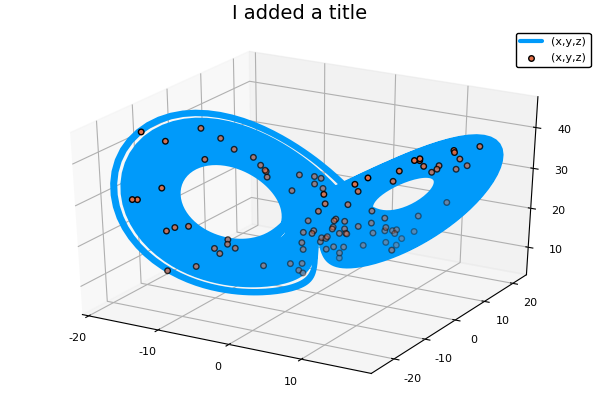

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [15]:
p = plot(sol,vars=(1,2,3))
scatter!(p,sol,vars=(1,2,3),plotdensity=100)
title!("I added a title")

You can do all sorts of things. Have fun!